## Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Input and Output

In [0]:
num_inputs = 4
dimension = 2

In [0]:
input_array = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

input_array

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [0]:
output_array = np.array([0, 1, 1, 0])

In [0]:
# Bias Input
bias = np.ones((num_inputs, 1))
input_array.shape

(4, 2)

In [0]:
var_mul = (input_array[:,0] * input_array[:,1]).reshape(num_inputs, 1)
input_bias = np.hstack((bias, input_array))
#input_bias = np.hstack((bias, var_mul, input_array))

input_bias

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

## Model

### Initialising weights

In [0]:
# randomly initialize the weights

weight = np.random.randn(dimension + 1)
#weight = np.random.randn(dimension + 2)

### Defining output function

In [0]:
# calculate the model output
model_output = input_bias.dot(weight)

In [0]:
def sigmoid(model_output):
    return 1/(1 + np.exp(-model_output))

In [0]:
Y_pred = sigmoid(model_output)

### Error Definition (Cross_Entropy)

In [0]:
# cross-entropy error
def cross_entropy(actual, prediction):
    E = 0
    for i in range(num_inputs):
        if actual[i] == 1:
            E -= np.log(prediction[i])
        else:
            E -= np.log(1 - prediction[i])
    return E

### Learning - Gradient Descent

In [0]:
# Gradient Descent
learning_rate = 0.01
error_array = []

In [0]:
for i in range(10000):
    error = cross_entropy(output_array, Y_pred)
    error_array.append(error)
    if i % 100 == 0:
        print(error)

    # gradient descent weight udpate
    weight += learning_rate * ( input_bias.T.dot(output_array - Y_pred) )

    Y_pred = sigmoid(input_bias.dot(weight))

5.08744043458076
3.1859714295947548
2.953570456278645
2.8901097869290693
2.852442995208356
2.8272987853077733
2.8102995277997116
2.798741435892964
2.7908351509161786
2.7853919185715568
2.78162008881331
2.77899006344432
2.777145417462675
2.775844635540248
2.7749228944118753
2.77426690435463
2.7737982568054202
2.7734623290108664
2.7732208372481164
2.7730468007419127
2.7729211097930864
2.772830169591406
2.7727642709648466
2.772716456218294
2.772681724719296
2.7726564733175607
2.772638100182719
2.7726247230741587
2.7726149781963323
2.7726078760936756
2.7726026981019443
2.772598921750947
2.772596166906153
2.772594156810891
2.772592689862085
2.772591619134907
2.7725908375121535
2.772590266873931
2.77258985023278
2.7725895460078944
2.7725893238543304
2.7725891616234954
2.772589043147209
2.7725889566216644
2.772588893428574
2.7725888472750255
2.7725888135657737
2.7725887889450855
2.772588770962293
2.77258875782763
2.7725887482339595
2.772588741226607
2.772588736108304
2.7725887323697793
2.7725

### Model output plotting

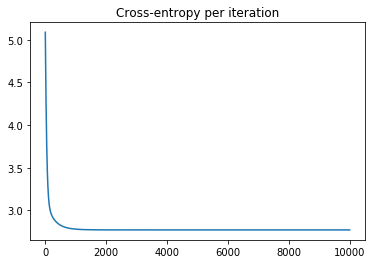

In [0]:
plt.plot(error_array)
plt.title("Cross-entropy per iteration")
plt.show()

## Model Performance

In [0]:
print("Final weight:", weight)
print("Final classification rate:", 
          1 - np.abs(output_array - np.round(Y_pred)).sum() / num_inputs)

Final weight: [ 1.43769485e-07 -1.21221053e-07 -1.21194521e-07]
Final classification rate: 0.75
